In [1]:
!pip install roboflow ultralytics

In [2]:
from roboflow import Roboflow

rf = Roboflow(api_key="3i8joYTxZ0xRoXF9rRN0")
project = rf.workspace("yoloworkspace-rhsrl").project("chair-occupied")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to chair-occupied-2 in yolov8:: 100%|██████████| 1254/1254 [00:00<00:00, 9184.59it/s]


In [3]:
from ultralytics import YOLO

In [4]:
# Load YOLOv8n (nano) pre-trained model
model = YOLO("yolov8n.pt")

# Train the model
model.train(
    data="/content/chair-occupied-2/data.yaml",  # path to dataset
    epochs=50,       # number of training epochs
    imgsz=640,       # image size
    batch=16         # batch size
)


Ultralytics 8.3.189 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/chair-occupied-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pre

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e85943a3500>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [5]:
model.val()

Ultralytics 8.3.189 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 896.0±421.2 MB/s, size: 27.9 KB)
val: Scanning /content/chair-occupied-2/valid/labels.cache... 52 images, 2 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 52/52 112193.3it/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 2.0it/s 2.0s
                   all         52        109       0.84      0.764      0.805      0.479
          Not Occupied         20         56      0.777      0.661      0.691      0.425
              occupied         31         53      0.903      0.868      0.919      0.533
Speed: 1.9ms preprocess, 14.3ms inference, 0.0ms loss, 7.2ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e858fd098e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [6]:
results = model.predict("/content/chair-occupied-2/test/images", save=True, imgsz=640, conf=0.5)


image 1/26 /content/chair-occupied-2/test/images/black-chair-and-spotlight-low-key-tone-on-empty-dark-room-background-with-alone-or-darkness_jpg.rf.fe7e09b46bdaa5786e1f9bb3ae658fa7.jpg: 640x640 1 Not Occupied, 11.9ms
image 2/26 /content/chair-occupied-2/test/images/casual-indian-businessman-seated-alone-260nw-2410549613_jpg.rf.8beea398d0f8334e41aae6c67426015a.jpg: 640x640 3 Not Occupieds, 1 occupied, 7.3ms
image 3/26 /content/chair-occupied-2/test/images/casually-handsome_jpg.rf.3cdd50073449bb2a9d280b7adcdbdba5.jpg: 640x640 1 occupied, 7.2ms
image 4/26 /content/chair-occupied-2/test/images/confident-mature-guy-sitting-on-a-chair-isolated-over-white_jpg.rf.4879b852625b01efbefd8cdc0d3c0e25.jpg: 640x640 1 occupied, 7.2ms
image 5/26 /content/chair-occupied-2/test/images/correct-sitting-position-at-desk-with-tablet_jpg.rf.ea3065c28d7c44c1bec4672684b7ba44.jpg: 640x640 1 occupied, 7.2ms
image 6/26 /content/chair-occupied-2/test/images/depositphotos_82524422-stock-photo-little-girl-sitting-in

In [17]:
from google.colab import files
uploaded = files.upload()  # Pick your image


Saving Coimbatore district library 3.jpg to Coimbatore district library 3.jpg


In [22]:
results = model.predict(list(uploaded.keys())[-1], save=True, imgsz=640, conf=0.5)
results



image 1/1 /content/Coimbatore district library 3.jpg: 416x640 1 occupied, 11.1ms
Speed: 4.3ms preprocess, 11.1ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/train6


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Not Occupied', 1: 'occupied'}
 obb: None
 orig_img: array([[[  0,   2,  10],
         [ 13,  11,  17],
         [ 28,  14,  20],
         ...,
         [230, 245, 241],
         [238, 252, 246],
         [244, 255, 252]],
 
        [[100, 103, 107],
         [ 94,  93,  95],
         [ 89,  78,  80],
         ...,
         [240, 255, 253],
         [232, 248, 241],
         [234, 250, 243]],
 
        [[190, 197, 190],
         [185, 187, 181],
         [184, 178, 173],
         ...,
         [209, 231, 226],
         [228, 250, 245],
         [217, 239, 234]],
 
        ...,
 
        [[216, 218, 252],
         [215, 220, 251],
         [217, 223, 252],
         ...,
         [154, 147, 138],
         [155, 148, 139],
         [156, 149, 140]],
 
        [[208, 217, 251],
         [207, 216, 250],
         [208, 218, 248],
         ..

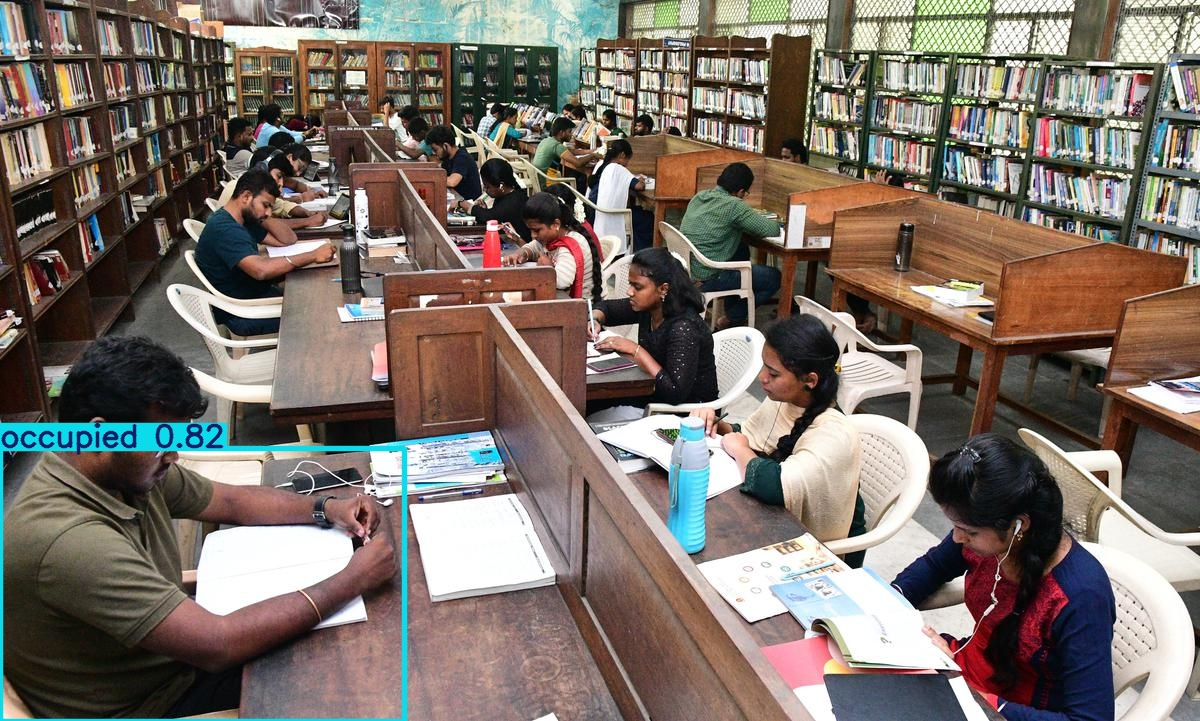

In [24]:
from IPython.display import Image
import glob

# Look inside train4 folder (since YOLO saved there)
result_path = glob.glob("runs/detect/train6/*.jpg") + glob.glob("runs/detect/train6/*.png") + glob.glob("runs/detect/train6/*.jpeg")

# Show latest result
Image(filename=result_path[-1])


In [26]:
for r in results:
    for box in r.boxes:
        cls = int(box.cls[0])  # class id
        conf = float(box.conf[0])  # confidence
        label = model.names[cls]  # class name
        print(f"{label} - {conf:.2f}")


occupied - 0.82


In [13]:
import csv

# Open CSV file for writing
with open("detections.csv", mode="w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["image", "label", "confidence"])  # header

    for r in results:
        img_name = r.path.split("/")[-1]  # image filename
        for box in r.boxes:
            cls = int(box.cls[0])   # class id
            conf = float(box.conf[0])  # confidence
            label = model.names[cls]  # class name
            writer.writerow([img_name, label, f"{conf:.2f}"])


In [28]:
from google.colab import files
files.download("detections.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
occupied_count = sum(1 for r in results for box in r.boxes if model.names[int(box.cls[0])] == "occupied")
print("Occupied chairs:", occupied_count)


Occupied chairs: 1
